In [1]:
import os
import pickle


import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
pwd

'/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/notebooks/1_ algos_investigation'

In [3]:
cd ../../src

/Users/cock/kDrive/PhD/Projects/Labs/blind-mitigation/src


In [4]:
from ml.models.tuglet_lstm import TugletLSTMModel

/opt/anaconda3/envs/PhetGPU/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Read Data and results

In [5]:
tuglet_data_path = '../data/tuglet/features/bilal_explore_challenge_rules_setup_time_oldposttest_binary_tuglet.pkl'
results_path = '../experiments/no_os/tuglet/label/tuglet/bilal_allincluded_binary/tuglet_lstm/label/2022_08_24_0/results/nonnested_cval_mtuglstm_lx.pkl'
config_path = '../experiments/oversample/no_os/tuglet/label/tuglet/bilal_allincluded_binary/tuglet_lstm/label/2022_08_24_0/config.yaml'

with open(tuglet_data_path, 'rb') as fp:
    tuglet = pickle.load(fp)
    
with open(results_path, 'rb') as fp:
    baseline = pickle.load(fp)
    
with open(config_path, 'rb') as fp:
    config_file = pickle.load(fp)

# Functions

In [6]:
# aesthetic

def choose_colours(n=1):
    palette = [
        '#E5F9F8', '#F92A82', '#FF9F1C', '#FFBF69', '#CBF3F0', '#2EC4B6'
    ]
    if n>6:
        replace = True
    else:
        replace=False
    return np.random.choice(palette, n, replace=replace)

palette = {
    'tp': '#FF9F1C',
    'fp': '#cbf3f0',
    'fn': '#F92A82'
}

In [7]:
# Compute Rates

def compute_tp(ypred, ytrue):
    assert len(ypred) == len(ytrue)
    pos_idx = [i for i in range(len(ytrue)) if ytrue[i] == 1]
    ps = len(pos_idx)
    tps = len([ypred[idx] for idx in pos_idx if ypred[idx] == 1])
    return tps / ps

def compute_fp(ypred, ytrue):
    assert len(ypred) == len(ytrue)
    neg_idx = [i for i in range(len(ytrue)) if ytrue[i] == 0]
    fps = len([ypred[idx] for idx in neg_idx if ypred[idx] == 1])
    tns = len(neg_idx) - fps
    return fps / (fps + tns)

def compute_fn(ypred, ytrue):
    assert len(ypred) == len(ytrue)
    pos_idx = [i for i in range(len(ytrue)) if ytrue[i] == 1]
    ps = len(pos_idx)
    tps = len([ypred[idx] for idx in pos_idx if ypred[idx] == 1])
    fns = ps - tps
    return fns / (fns + tps)
    
    

In [8]:
# Cluster functions
def compute_rates(ytrues, ypreds, associated_clusters, cluster):
    assert len(ytrues) == len(ypreds) and len(ypreds) == len(associated_clusters)
    cluster_idx = [i for i in range(len(associated_clusters)) if associated_clusters[i] == cluster]
    yt = [ytrues[idx] for idx in cluster_idx]
    yps = [ypreds[idx] for idx in cluster_idx]
    
    tp = compute_tp(yps, yt)
    fp = compute_fp(yps, yt)
    fn = compute_fn(yps, yt)
    
    return tp, fp, fn

def plot_rates(ytrues, ypreds, associated_clusters, dataset):
    unique_clusters = np.unique(associated_clusters)
    colours = choose_colours(len(unique_clusters))
    
    for m, metric in enumerate(['tp', 'fp', 'fn']):
        ms = []
        for c, cluster in enumerate(unique_clusters):
            cluster_tp, cluster_fp, cluster_fn = compute_rates(ytrues, ypreds, associated_clusters, cluster)
            metrics = [cluster_tp, cluster_fp, cluster_fn]
            ms.append(metrics[m])
        plt.figure(figsize=(5, 3))
        plt.bar(range(len(ms)), ms, color=palette[metric])
        plt.ylim([0, 1])
        plt.xlim([-0.5, len(ms) -0.5])

        plt.xticks(range(len(ms)), unique_clusters)
        plt.title('{} rates for all clusters [{}]'.format(metric, dataset))
        plt.savefig('../reports/tuglet/cluster_{}_rates_{}'.format(metric, dataset))
        plt.show()


# Test set plot


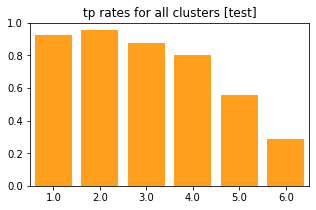

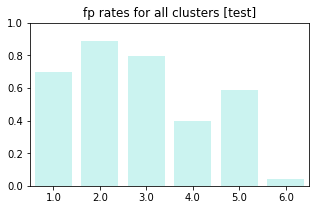

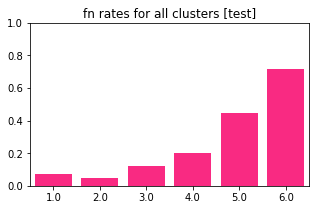

In [9]:
y_trues = []
y_probas = []
y_preds = []
associated_clusters = []
for fold in range(10):
    yts = [baseline['y'][test_idx] for test_idx in baseline[fold]['test_index']]
    ypbs = [yp for yp in baseline[fold]['y_proba']]
    ypds = [ypp for ypp in baseline[fold]['y_pred']]
    acs = [
        baseline['demographics']['cluster'][test_idx] for test_idx in baseline[fold]['test_index']
    ]
    y_trues = [*y_trues, *yts]
    y_probas = [*y_probas, *ypbs]
    y_preds = [*y_preds, *ypds]
    associated_clusters = [*associated_clusters, *acs]
plot_rates(y_trues, y_preds, associated_clusters, 'test')

# Train set

2022-08-31 18:33:09.115356: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking (Masking)           (None, None, 9)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                5376      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_1 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_1 (LSTM)             

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_2 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                5376      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_3 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_3 (LSTM)           

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_4 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_4 (LSTM)               (None, 32)                5376      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_5 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_5 (LSTM)           

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_6 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_6 (LSTM)               (None, 32)                5376      
                                                                 
 dense_6 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_7 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_7 (LSTM)           

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 masking_9 (Masking)         (None, None, 9)           0         
                                                                 
 lstm_9 (LSTM)               (None, 32)                5376      
                                                                 
 dense_9 (Dense)             (None, 2)                 66        
                                                                 
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
_________________________________________________________________
None


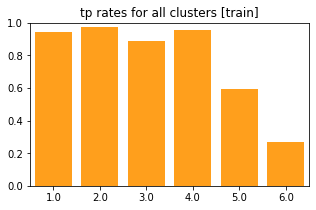

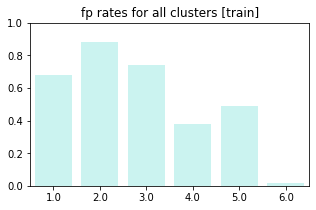

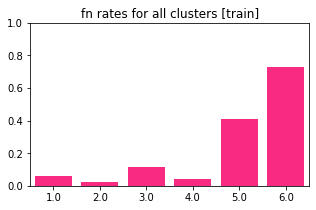

In [10]:
x = [tuglet[idx]['sequence'] for idx in range(264)]

root = '../experiments/oversample/no_os/tuglet/label/tuglet/bilal_allincluded_binary/tuglet_lstm/label/2022_08_24_0/models/tuglstm_f'
model_tuglet = TugletLSTMModel(config_file)

y_trues = []
y_probas = []
y_preds = []
associated_clusters = []
for fold in range(10):
    xs = [baseline['x'][train_idx] for train_idx in baseline[fold]['train_index']]
    yts = [baseline['y'][train_idx] for train_idx in baseline[fold]['train_index']]
    
    model_tuglet.set_outer_fold(fold)
    model_tuglet.load_model_weights(x, '{}{}'.format(root, fold))
    
    ypds = model_tuglet.predict(xs)
    
    acs = [
        baseline['demographics']['cluster'][train_idx] for train_idx in baseline[fold]['train_index']
    ]
    
    y_trues = [*y_trues, *yts]
    y_preds = [*y_preds, *ypds]
    associated_clusters = [*associated_clusters, *acs]
    
plot_rates(y_trues, y_preds, associated_clusters, 'train')
